In [7]:
import gc
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [8]:
# Define constants
IMG_SIZE = (128, 128)  # Smaller image size to save memory
BATCH_SIZE = 16         # Reduced batch size to fit within memory limits
NUM_CLASSES = 35       # Adjust this to match your dataset

In [9]:
# Set up data generators for memory efficiency
datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2  # 80% training, 20% validation split
)

train_generator = datagen.flow_from_directory(
    '/home/mostafabakr/Desktop/GU Materials/AIE 111/Lab/data',             # Replace with your data directory path
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/home/mostafabakr/Desktop/GU Materials/AIE 111/Lab/data',             # Replace with your data directory path
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 23773 images belonging to 35 classes.
Found 5927 images belonging to 35 classes.


In [10]:
# Define model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model using data generators
history = model.fit(
    train_generator,
    epochs=10,                        # Adjust based on needs
    validation_data=validation_generator
)

Epoch 1/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8796 - loss: 0.4494 - val_accuracy: 0.9730 - val_loss: 0.1456
Epoch 2/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9950 - loss: 0.0198 - val_accuracy: 0.9825 - val_loss: 0.0798
Epoch 3/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9989 - loss: 0.0041 - val_accuracy: 0.9792 - val_loss: 0.1016
Epoch 4/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9969 - loss: 0.0132 - val_accuracy: 0.9745 - val_loss: 0.0969
Epoch 5/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9975 - loss: 0.0114 - val_accuracy: 0.9745 - val_loss: 0.2216
Epoch 6/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9590 - val_loss: 0.3083
Epoch 7/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9986 - loss: 0.0069 - val_accuracy: 0.9814 - val_loss: 0.1374
Epoch 8/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9986 -

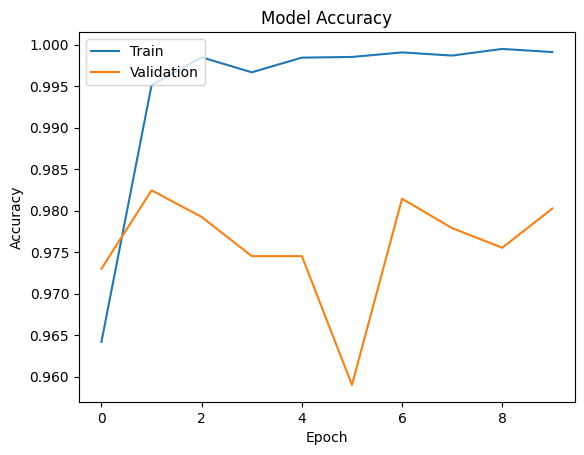

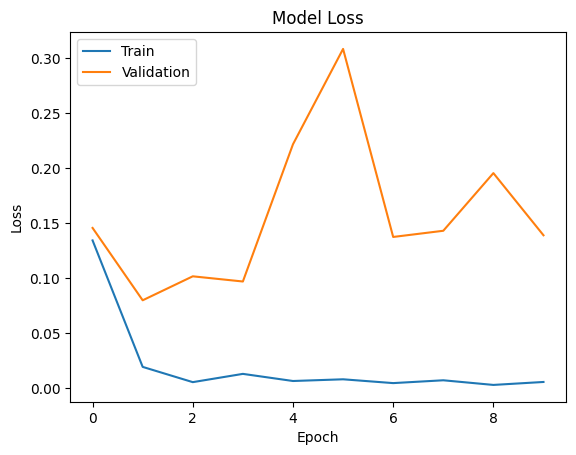

11495

In [12]:
model.save('/home/mostafabakr/Desktop/GU Materials/AIE 111/Lab/sign_language_model.h5')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Clean up resources
gc.collect()